# Chapter 1

In [3]:
users = [{ "id": 0, "name": "Hero" },{ "id": 1, "name": "Dunn" },{ "id": 2, "name": "Sue" },{ "id": 3, "name": "Chi" },{ "id": 4, "name": "Thor" },
         { "id": 5, "name": "Clive" },{ "id": 6, "name": "Hicks" },{ "id": 7, "name": "Devin" },{ "id": 8, "name": "Kate" },
         { "id": 9, "name": "Klein" }]


In [4]:
friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
(4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

In [5]:
for user in users:
    user["friends"] = []

In [6]:
for i, j in friendships:
    users[i]["friends"].append(users[j]) 
    users[j]["friends"].append(users[i]) 

In [7]:
def number_of_friends(user):
    return len(user["friends"]) 
total_connections = sum(number_of_friends(user)
                        for user in users) 

In [8]:
from __future__ import division 
num_users = len(users) 
avg_connections = total_connections / num_users

In [9]:
def friends_of_friend_ids_bad(user):
    return [foaf["id"]
            for friend in user["friends"] 
            for foaf in friend["friends"]]

In [10]:
users[0]

{'id': 0,
 'name': 'Hero',
 'friends': [{'id': 1,
   'name': 'Dunn',
   'friends': [{...},
    {'id': 2,
     'name': 'Sue',
     'friends': [{...},
      {...},
      {'id': 3,
       'name': 'Chi',
       'friends': [{...},
        {...},
        {'id': 4,
         'name': 'Thor',
         'friends': [{...},
          {'id': 5,
           'name': 'Clive',
           'friends': [{...},
            {'id': 6,
             'name': 'Hicks',
             'friends': [{...},
              {'id': 8,
               'name': 'Kate',
               'friends': [{...},
                {'id': 7, 'name': 'Devin', 'friends': [{...}, {...}]},
                {'id': 9, 'name': 'Klein', 'friends': [{...}]}]}]},
            {'id': 7,
             'name': 'Devin',
             'friends': [{...},
              {'id': 8,
               'name': 'Kate',
               'friends': [{'id': 6,
                 'name': 'Hicks',
                 'friends': [{...}, {...}]},
                {...},
                {'id

In [11]:
from collections import Counter 
def not_the_same(user, other_user):
    return user["id"] != other_user["id"]
def not_friends(user, other_user):
    return all(not_the_same(friend, other_user)
               for friend in user["friends"])
def friends_of_friend_ids(user):
    return Counter(foaf["id"]
                   for friend in user["friends"] 
                   for foaf in friend["friends"] 
                   if not_the_same(user, foaf) 
                   and not_friends(user, foaf)) 
print (friends_of_friend_ids(users[3]))

Counter({0: 2, 5: 1})


In [12]:
print([friend["id"] for friend in users[0]["friends"]]) 
print([friend["id"] for friend in users[1]["friends"]]) 
print ([friend["id"] for friend in users[2]["friends"]]) 

[1, 2]
[0, 2, 3]
[0, 1, 3]


In [13]:
interests = [
(0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
(0, "Spark"), (0, "Storm"), (0, "Cassandra"),
(1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
(1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
(2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
(3, "statistics"), (3, "regression"), (3, "probability"),
(4, "machine learning"), (4, "regression"), (4, "decision trees"),
(4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
(5, "Haskell"), (5, "programming languages"), (6, "statistics"),
(6, "probability"), (6, "mathematics"), (6, "theory"),
(7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
(7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
(8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
(9, "Java"), (9, "MapReduce"), (9, "Big Data")
]


In [14]:
def data_scientists_who_like(target_interest):
    return [user_id
            for user_id, user_interest in interests
            if user_interest == target_interest]

In [15]:
from collections import defaultdict
user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)
interests_by_user_id = defaultdict(list)
for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

In [16]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
(48000, 0.7), (76000, 6),
(69000, 6.5), (76000, 7.5),
(60000, 2.5), (83000, 10),
(48000, 1.9), (63000, 4.2)]

In [17]:
salary_by_tenure = defaultdict(list)
for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)

average_salary_by_tenure = {
    tenure : sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}    

In [18]:
def tenure_bucket(tenure):
    if tenure < 2:
        return "less than two"
    elif tenure < 5:
         return "between two and five"
    else:
        return "more than five"

In [19]:
words_and_counts = Counter(word
                           for user, interest in interests
                           for word in interest.lower().split())
for word, count in words_and_counts.most_common():
    if count > 1:
        print (word, count)

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2


# Chapter 3

In [20]:
from matplotlib import pyplot as plt
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')
plt.title("Nominal GDP")
plt.ylabel("Billions of $")
plt.show()

<Figure size 640x480 with 1 Axes>

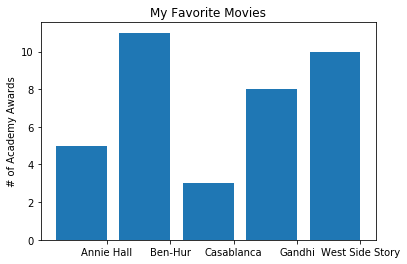

In [21]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]
xs = [i + 0.1 for i, _ in enumerate(movies)]
plt.bar(xs, num_oscars)
plt.ylabel("# of Academy Awards")
plt.title("My Favorite Movies")
plt.xticks([i + 0.5 for i, _ in enumerate(movies)], movies)
plt.show()

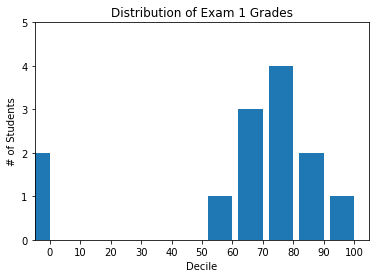

In [23]:
grades = [83,95,91,87,70,0,85,82,100,67,73,77,0]
decile = lambda grade: grade // 10 * 10
histogram = Counter(decile(grade) for grade in grades)
plt.bar([x - 4 for x in histogram.keys()], 
histogram.values(),
8) 
plt.axis([-5, 105, 0, 5]) 
plt.xticks([10 * i for i in range(11)]) 
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")
plt.show()


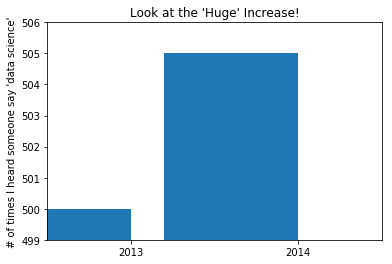

In [24]:
mentions = [500, 505]
years = [2013, 2014]
plt.bar([2012.6, 2013.6], mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")
plt.ticklabel_format(useOffset=False)
plt.axis([2012.5,2014.5,499,506])
plt.title("Look at the 'Huge' Increase!")
plt.show()

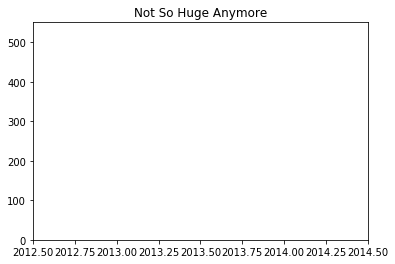

In [25]:
plt.axis([2012.5,2014.5,0,550])
plt.title("Not So Huge Anymore")
plt.show()

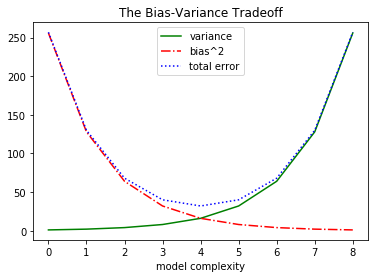

In [26]:
variance = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error = [x + y for x, y in zip(variance, bias_squared)]
xs = [i for i, _ in enumerate(variance)]
plt.plot(xs, variance, 'g-', label='variance') 
plt.plot(xs, bias_squared, 'r-.', label='bias^2') 
plt.plot(xs, total_error, 'b:', label='total error') # blue dotted lin
plt.legend(loc=9)
plt.xlabel("model complexity")
plt.title("The Bias-Variance Tradeoff")
plt.show()

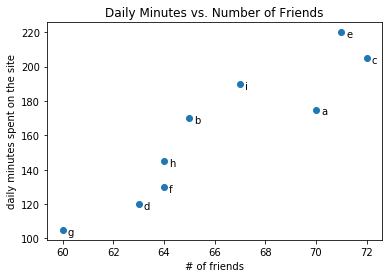

In [27]:
friends = [ 70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']
plt.scatter(friends, minutes)
for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label,
        xy=(friend_count, minute_count), 
        xytext=(5, -5), 
        textcoords='offset points')
plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()


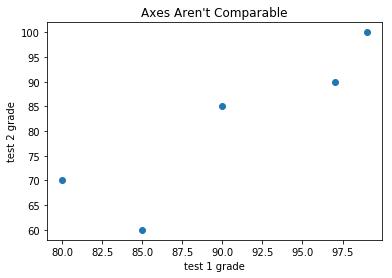

In [28]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]
plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.show()

# chapter 4

In [29]:
height_weight_age = [70, 170, 40 ] 
grades = [95,80, 75, 62 ]

In [30]:
from matplotlib import pyplot as plt
def vector_add(v, w):
    return [v_i + w_i
            for v_i, w_i in zip(v, w)]


In [31]:
def vector_subtract(v, w):
    return [v_i - w_i
            for v_i, w_i in zip(v, w)]


In [32]:
def vector_sum(vectors):
    result = vectors[0] 
    for vector in vectors[1:]: 
        result = vector_add(result, vector) 
    return result


In [33]:
def vector_sum(vectors):
    return reduce(vector_add, vectors)

In [34]:
def scalar_multiply(c, v):
    return [c * v_i for v_i in v]


In [35]:
def vector_mean(vectors):
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))


In [36]:
def dot(v, w):
    return sum(v_i * w_i
               for v_i, w_i in zip(v, w))


In [37]:
def sum_of_squares(v):
    return dot(v, v)


In [38]:
import math
def magnitude(v):
    return math.sqrt(sum_of_squares(v))

In [39]:
def squared_distance(v, w):
    return sum_of_squares(vector_subtract(v, w))
def distance(v, w):
    return math.sqrt(squared_distance(v, w))
def distance(v, w):
    return magnitude(vector_subtract(v, w))

In [40]:
A = [[1, 2, 3], [4, 5, 6]]
B = [[1, 2], [3, 4],[5, 6]]
def shape(A):
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0 
    return num_rows, num_cols
print(shape(A))

(2, 3)


In [41]:
def get_row(A, i):
    return A[i] 
def get_column(A, j):
    return [A_i[j] 
            for A_i in A]

In [42]:
def make_matrix(num_rows, num_cols, entry_fn):
    return [[entry_fn(i, j) 
             for j in range(num_cols)] 
            for i in range(num_rows)]

In [43]:
def is_diagonal(i, j):
    return 1 if i == j else 0
identity_matrix = make_matrix(5, 5, is_diagonal)

# Chapter 10


In [44]:
def bucketize(point, bucket_size):
    """floor the point to the next lower multiple of bucket_size"""
    return bucket_size * math.floor(point / bucket_size)

In [45]:
def make_histogram(points, bucket_size):
    """buckets the points and counts how many in each bucket"""
    return Counter(bucketize(point, bucket_size) for point in points)

In [46]:
def plot_histogram(points, bucket_size, title=""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)
    plt.show()

In [47]:
from __future__ import division
from scipy.stats import norm
from collections import Counter
import numbers
import math, random
import matplotlib.pyplot as plt


In [48]:
random.seed(0)
# uniform between -100 and 100
uniform = [200 * random.random() - 100 for _ in range(10000)]

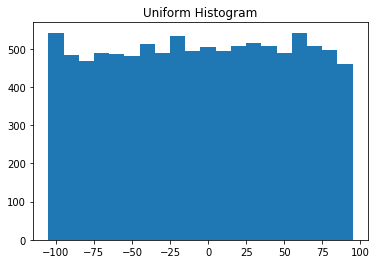

In [49]:
plot_histogram(uniform, 10, "Uniform Histogram")

In [50]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np, random
from scipy.special import ndtri

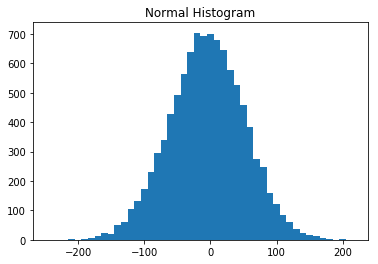

In [51]:
random.seed(0)

def inverse_normal_cdf(r):
    return ndtri(r)

def random_normal():
    return inverse_normal_cdf(random.random())

# normal distribution with mean 0, standard deviation 57
normal = [57 * inverse_normal_cdf(random.random()) 
          for _ in range(10000)]

plot_histogram(normal, 10, "Normal Histogram")

In [52]:
def random_normal():
    return inverse_normal_cdf(random.random())

xs = [random_normal() for _ in range(1000)]
ys1 = [ x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

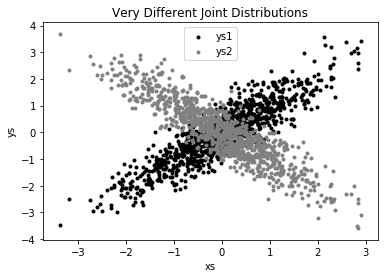

In [53]:
plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
plt.scatter(xs, ys2, marker='.', color='gray', label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
plt.show()

In [54]:
def standard_deviation(x):
    return math.sqrt(variance(x))

In [55]:
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0

In [56]:
def correlation_matrix(data):
    """returns the num_columns x num_columns matrix whose (i, j)th entry
    is the correlation between columns i and j of data"""
    _, num_columns = shape(data)
    def matrix_entry(i, j):
        return correlation(get_column(data, i), get_column(data, j))
    return make_matrix(num_columns, num_columns, matrix_entry)

In [57]:
data = [[70, 170, 40],
[65, 120, 26],
[77, 250, 19],
# ....
]

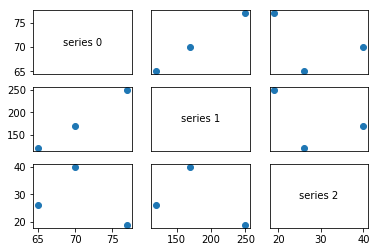

In [58]:
import matplotlib.pyplot as plt
_, num_columns = shape(data)
fig, ax = plt.subplots(num_columns, num_columns)
for i in range(num_columns):
    for j in range(num_columns):
    # scatter column_j on the x-axis vs column_i on the y-axis
        if i != j: ax[i][j].scatter(get_column(data, j), get_column(data, i))
        # unless i == j, in which case show the series name
        else: ax[i][j].annotate("series " + str(i), (0.5, 0.5),
        xycoords='axes fraction',
        ha="center", va="center")
        # then hide axis labels except left and bottom charts
        if i < num_columns - 1: ax[i][j].xaxis.set_visible(False)
        if j > 0: ax[i][j].yaxis.set_visible(False)
# fix the bottom right and top left axis labels, which are wrong because
# their charts only have text in them
ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
ax[0][0].set_ylim(ax[0][1].get_ylim())
plt.show()

In [59]:
def parse_row(input_row, parsers):
    """given a list of parsers (some of which may be None)
    apply the appropriate one to each element of the input_row"""
    
    return [parser(value) if parser is not None else value
            for value, parser in zip(input_row, parsers)]
  
def parse_rows_with(reader, parsers):
    """wrap a reader to apply the parsers to each of its rows"""
    for row in reader:
        yield parse_row(row, parsers)

In [60]:
def try_or_none(f):
    """wraps f to return None if f raises an exception
    assumes f takes only one input"""
    def f_or_none(x):
        try: return f(x)
        except: return None
    return f_or_none

In [61]:
def parse_row(input_row, parsers):
    return [try_or_none(parser)(value) if parser is not None else value
            for value, parser in zip(input_row, parsers)]

In [62]:
import csv
import dateutil.parser
data = []
with open("comma_delimited_stock_prices.csv", "rb") as f:
    reader = csv.reader(f)
    for line in parse_rows_with(reader, [dateutil.parser.parse, None, float]):
        data.append(line)

Error: iterator should return strings, not bytes (did you open the file in text mode?)

In [63]:
for row in data:
    if any(x is None for x in row):
        print (row)

In [64]:
def try_parse_field(field_name, value, parser_dict):
    """try to parse value using the appropriate function from parser_dict"""
    parser = parser_dict.get(field_name) # None if no such entry
    if parser is not None:
        return try_or_none(parser)(value)
    else:
        return value

In [65]:
def parse_dict(input_dict, parser_dict):
        return { field_name : try_parse_field(field_name, value, parser_dict)
                  for field_name, value in input_dict.iteritems() }

In [66]:
import datetime
data = [{'closing_price': 102.06,
'date': datetime.datetime(2014, 8, 29, 0, 0),
'symbol': 'AAPL'}]

In [67]:
max_aapl_price = max(row["closing_price"]
                     for row in data
                     if row["symbol"] == "AAPL")

In [68]:
# group rows by symbol
from collections import *
by_symbol = defaultdict(list)
for row in data:
    by_symbol[row["symbol"]].append(row)
# use a dict comprehension to find the max for each symbol
max_price_by_symbol = { symbol : max(row["closing_price"]
                                      for row in grouped_rows)
                       for symbol, grouped_rows in by_symbol.items() }

In [69]:
def picker(field_name):
    """returns a function that picks a field out of a dict"""
    return lambda row: row[field_name]
  
def pluck(field_name, rows):
    """turn a list of dicts into the list of field_name values"""
    return map(picker(field_name), rows)

In [70]:
def group_by(grouper, rows, value_transform=None):
    # key is output of grouper, value is list of rows
    grouped = defaultdict(list)
    for row in rows:
        grouped[grouper(row)].append(row)
    if value_transform is None:
        return grouped
    else:
        return { key : value_transform(rows)
                for key, rows in grouped.items() }


In [71]:
max_price_by_symbol = group_by(picker("symbol"),
data,
lambda rows: max(pluck("closing_price", rows)))

In [72]:
def percent_price_change(yesterday, today):
    return today["closing_price"] / yesterday["closing_price"] - 1
  
def day_over_day_changes(grouped_rows):
    # sort the rows by date
    ordered = sorted(grouped_rows, key=picker("date"))
    
    # zip with an offset to get pairs of consecutive days
    return [{ "symbol" : today["symbol"],
              "date" : today["date"],
              "change" : percent_price_change(yesterday, today) }
            for yesterday, today in zip(ordered, ordered[1:])]

In [73]:
# key is symbol, value is list of "change" dicts
changes_by_symbol = group_by(picker("symbol"), data, day_over_day_changes)

# collect all "change" dicts into one big list
all_changes = [change
               for changes in changes_by_symbol.values()
               for change in changes]

In [74]:
max(all_changes, key=picker("change"))
# {'change': 0.3283582089552237,
# 'date': datetime.datetime(1997, 8, 6, 0, 0),
# 'symbol': 'AAPL'}
# see, e.g. http://news.cnet.com/2100-1001-202143.html
min(all_changes, key=picker("change"))
# {'change': -0.5193370165745856,
# 'date': datetime.datetime(2000, 9, 29, 0, 0),
# 'symbol': 'AAPL'}
# see, e.g. http://money.cnn.com/2000/09/29/markets/techwrap/

ValueError: max() arg is an empty sequence

In [75]:
def combine_pct_changes(pct_change1, pct_change2):
    return (1 + pct_change1) * (1 + pct_change2) - 1
def overall_change(changes):
    return reduce(combine_pct_changes, pluck("change", changes))
overall_change_by_month = group_by(lambda row: row['date'].month,
                                   all_changes,
                                   overall_change)

In [76]:
def squared_distance(v, w):
    """(v_1 - w_1) ** 2 + ... + (v_n - w_n) ** 2"""
    return sum_of_squares(vector_subtract(v, w))
def distance(v, w):
    return math.sqrt(squared_distance(v, w))

In [77]:
def distance(v, w):
    return magnitude(vector_subtract(v, w))

In [81]:
a_to_b = distance([63, 150], [67, 160]) # 10.77
a_to_c = distance([63, 150], [70, 171]) # 22.14
b_to_c = distance([67, 160], [70, 171]) # 11.40
print(a_to_b)
print(a_to_c)
print(b_to_c)

10.770329614269007
22.135943621178654
11.40175425099138


In [82]:
a_to_b = distance([160, 150], [170.2, 160]) # 14.28
a_to_c = distance([160, 150], [177.8, 171]) # 27.53
b_to_c = distance([170.2, 160], [177.8, 171]) # 13.37
print(a_to_b)
print(a_to_c)
print(b_to_c)

14.284257068535268
27.52889391167034
13.370115930686627


In [83]:
def scale(data_matrix):
    """returns the means and standard deviations of each column"""
    num_rows, num_cols = shape(data_matrix)
    means = [mean(get_column(data_matrix,j))
                for j in range(num_cols)]
    stdevs = [standard_deviation(get_column(data_matrix,j))
                for j in range(num_cols)]
    return means, stdevs

In [90]:
def rescale(data_matrix):
    """rescales the input data so that each column
    has mean 0 and standard deviation 1
    leaves alone columns with no deviation"""
    means, stdevs = scale(data_matrix)
    
    def rescaled(i, j):
        if stdevs[j] > 0:
            return (data_matrix[i][j] - means[j]) / stdevs[j]
        else:
            return data_matrix[i][j]
      
    num_rows, num_cols = shape(data_matrix)
    return make_matrix(num_rows, num_cols, rescaled)

In [91]:
def de_mean_matrix(A):
    """returns the result of subtracting from every value in A the mean
    value of its column. the resulting matrix has mean 0 in every column"""
    nr, nc = shape(A)
    column_means, _ = scale(A)
    return make_matrix(nr, nc, lambda i, j: A[i][j] - column_means[j])

In [92]:
def direction(w):
    mag = magnitude(w)
    return [w_i / mag for w_i in w]

In [93]:
def directional_variance_i(x_i, w):
    """the variance of the row x_i in the direction determined by w"""
    return dot(x_i, direction(w)) ** 2

In [94]:
def directional_variance(X, w):
    """the variance of the data in the direction determined w"""
    return sum(directional_variance_i(x_i, w)
    for x_i in X)

In [95]:
def directional_variance_gradient_i(x_i, w):
    """the contribution of row x_i to the gradient of
    the direction-w variance"""
    projection_length = dot(x_i, direction(w))
    return [2 * projection_length * x_ij for x_ij in x_i]

In [96]:
def directional_variance_gradient(X, w):
    return vector_sum(directional_variance_gradient_i(x_i,w)
    for x_i in X)

In [97]:
def first_principal_component(X):
    guess = [1 for _ in X[0]]
    unscaled_maximizer = maximize_batch(
        partial(directional_variance, X), # is now a function of w
        partial(directional_variance_gradient, X), # is now a function of w
        guess)
    return direction(unscaled_maximizer)

In [99]:
def first_principal_component_sgd(X):
    guess = [1 for _ in X[0]]
    unscaled_maximizer = maximize_stochastic(
        lambda x, _, w: directional_variance_i(x, w),
        lambda x, _, w: directional_variance_gradient_i(x, w),
        X,
        [None for _ in X], # the fake "y"
        guess)
    return direction(unscaled_maximizer)

In [100]:
def project(v, w):
    """return the projection of v onto the direction w"""
    projection_length = dot(v, w)
    return scalar_multiply(projection_length, w)

In [101]:
def remove_projection_from_vector(v, w):
    """projects v onto w and subtracts the result from v"""
    return vector_subtract(v, project(v, w))

In [102]:
def remove_projection(X, w):
    """for each row of X
    projects the row onto w, and subtracts the result from the row"""
    return [remove_projection_from_vector(x_i, w) for x_i in X]

In [103]:
def principal_component_analysis(X, num_components):
    components = []
    for _ in range(num_components):
        component = first_principal_component(X)
        components.append(component)
        X = remove_projection(X, component)
    return components

In [104]:
def transform_vector(v, components):
    return [dot(v, w) for w in components]
def transform(X, components):
    return [transform_vector(x_i, components) for x_i in X]